In [0]:
"""
In this notebook , i want to collect most used methods in 1 notebook for future reference.
Lemmatization has some edge cases like adverbs.
I wanted to have a utility for this edge case.
"""
import nltk
from nltk.tokenize import word_tokenize

In [6]:
#nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()
stem.stem('learning')

'learn'

In [7]:
from nltk.corpus import stopwords
import string
from nltk.corpus import wordnet as wn
from nltk import WordNetLemmatizer, pos_tag, word_tokenize
from nltk.corpus import wordnet
#nltk.download('stopwords')

class TextUtils(object):
    """
    split the document into sentences and tokenize each sentence
    """
    def __init__(self):
        self.splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.tokenizer = nltk.tokenize.TreebankWordTokenizer()
        self.lem = WordNetLemmatizer()
        self.stop_words = stopwords.words('english')

    def get_adverb_lemma(self,adverb):
      s = []
      for ss in wn.synsets(adverb):
        for lemmas in ss.lemmas(): # all possible lemmas.
            s.append(lemmas)
      #print("s",s)      
      winner = ""
      for pers in s:
        #print("pers",pers)
        #print("pertainyms",pers.pertainyms())
        if len(pers.pertainyms()) > 0:
          posword = pers.pertainyms()[0].name()
          if posword[0:3] == adverb[0:3]:
            #print(posword," - ",adverb)
            winner = posword
            break
      #print("winner",winner, " s",s)      
      if len(winner ) > 0: 
        return winner
      if len(s) > 0 :
        return s[0].name()  
      return ""        

    def lemmatize(self,word):
      # Get the single character pos constant from pos_tag like this:
      pos_label = (pos_tag(word_tokenize(word))[0][1][0]).lower()
      if pos_label == 'j': 
        pos_label = 'a'    # 'j' <--> 'a' reassignment
    
      if pos_label in ['r']:  # For adverbs it's a bit different
        return self.get_adverb_lemma(word) #wordnet.synset(word+'.r.1').lemmas()[0].pertainyms()[0].name()
      elif pos_label in ['a', 's', 'v']: # For adjectives and verbs
        return self.lem.lemmatize(word, pos=pos_label)
      else:   # For nouns and everything else as it is the default kwarg
        return self.lem.lemmatize(word)         
    
    def remove_noise(self,tokens):
      clean_tokens = []
      lemmatizer = WordNetLemmatizer()    
      for token in tokens:
        #print("t",token)
        token = self.lemmatize(token)        
        #print("t2:",token)
        if len(token) > 0 and token not in string.punctuation and token.lower() not in self.stop_words:
          clean_tokens.append(token)    
      return clean_tokens

    def split_clean(self,sentence):
      sentence_tokens = self.split(sentence)
      sentence_results = self.remove_noise(sentence_tokens)      
      return sentence_results
      
    def split(self,sentence):
      return word_tokenize(sentence)

    def extract_words(self,tokens_list):      
      clean_tokens_list = [self.remove_noise(tokens) for tokens in tokens_list]
      all_words = []
      for tokens in clean_tokens_list:
        for token in tokens:
          all_words.append(token)
      return all_words    

text_utils = TextUtils()

tokens = text_utils.split_clean("loved sadly urgently rapidly  . learning worst ugly . bad news.")
tokens


['love', 'sad', 'urgent', 'rapid', 'learn', 'bad', 'ugly', 'bad', 'news']

In [8]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


In [9]:
max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
#xx = imdb.load_data(nb_words=5000)

In [11]:
#create reverse index
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
word2index = imdb.get_word_index()

def seq_to_word(xi):
  review = [reverse_word_index.get(i-3, "?") for i in xi]
  return " ".join(review)

1646592/1641221 [==============================] - 0s 0us/step


In [28]:
def dump_info(index):
  print("Review")
  print(seq_to_word(x_train[index]))

def to_sentence(index):  
  return seq_to_word(x_train[index])

for index in range(2):
  print("******************************")
  dump_info(index)  

******************************
Review
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are ama

In [0]:
import numpy as np


In [17]:
#dump a negative
neg = dump_info(np.where(y_train == 0)[0][0])

Review
? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


In [16]:
#dump a positivie
pos = dump_info(np.where(y_train == 1)[0][0])

Review
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for 

In [0]:
negatives = np.where(y_train == 0)
positives = np.where(y_train == 1)

In [0]:
negative_sentences = [to_sentence(neg) for neg in negatives[0] ]

In [38]:
negative_sentences[0:2]

["? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then",
 "? this has to be one of the worst film

In [0]:
positives_sentences = [to_sentence(pos) for pos in positives[0] ]

In [41]:
positives_sentences[0:2]

["? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what 

In [0]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
cloud = WordCloud(max_font_size=60).generate(' '.join(negative_sentences))


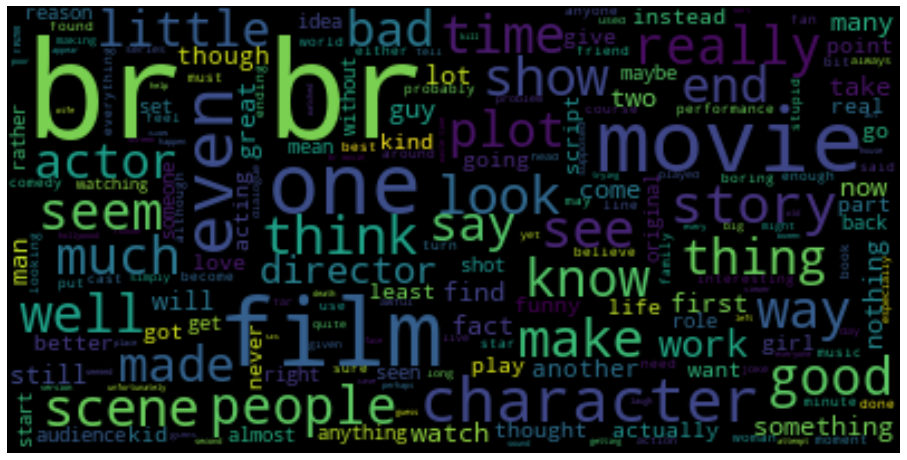

In [45]:
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

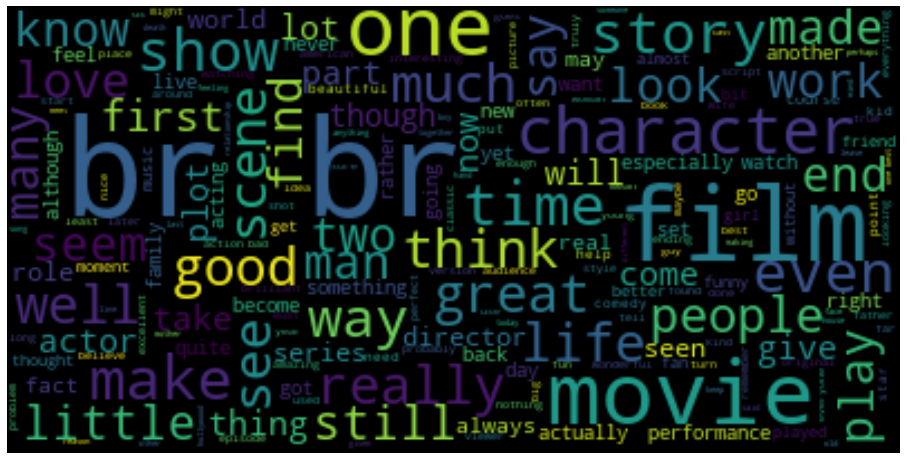

In [46]:
cloud = WordCloud(max_font_size=60).generate(' '.join(positives_sentences))
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
test_sentences= [str(i) for i in range(30)] + [str(i) for i in range(10)]
test_sentences
' '.join(test_sentences)

'0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 0 1 2 3 4 5 6 7 8 9'

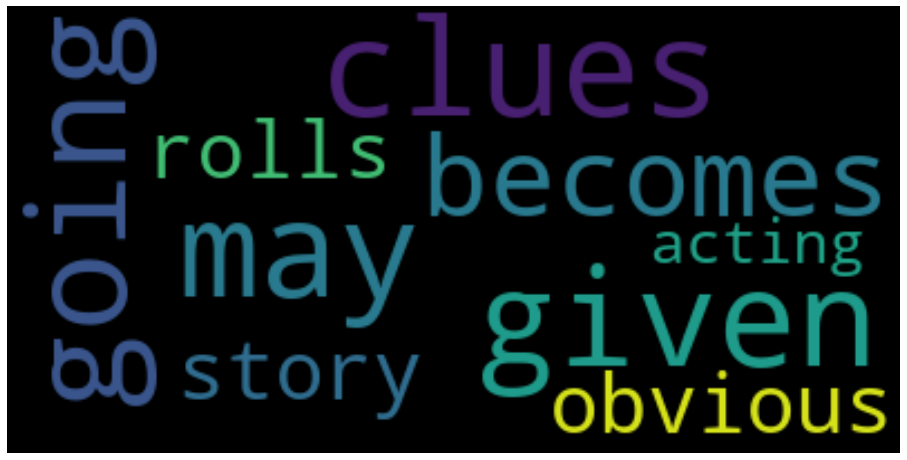

In [60]:
cloud = WordCloud(max_font_size=60).generate('you are given clues as to what may be going on here it becomes more and more obvious as the story rolls on the acting you')
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()